In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib

/Users/Xianbo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv('countytable.csv' , index_col=0 )

In [6]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,trumpp
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,0.754018
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,0.798123
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,27.0,0,0,188337,6334,0,8,884.88,31.0,0.528359
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,0.0,0,0,124707,5804,10757,19,622.58,36.8,0.782270
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,23.2,341544,0,319700,5622,20941,3,644.78,88.9,0.913855


In [7]:
data.rename(columns={'PST045214': 'Population'}, inplace=True)

In [8]:
data.rename(columns={'AGE295214': 'Population18'}, inplace=True)

In [9]:
data.rename(columns={'AGE775214': 'Population65'}, inplace=True)

In [10]:
data.rename(columns={'SEX255214': 'Female'}, inplace=True)

In [11]:
data.rename(columns={'SEX255214': 'Female'}, inplace=True)

In [12]:
data.rename(columns={'RHI125214': 'White'}, inplace=True)

In [13]:
data.rename(columns={'RHI225214': 'Black'}, inplace=True)

In [14]:
data.rename(columns={'RHI425214': 'Asian'}, inplace=True)

In [15]:
data.rename(columns={'POP645213': 'Foreign'}, inplace=True)

In [16]:
data.rename(columns={'EDU685213': 'Bachelor'}, inplace=True)

In [17]:
data.rename(columns={'RHI725214': 'Latino'}, inplace=True)

In [18]:
data.rename(columns={'RHI625214': 'Mixed'}, inplace=True)

In [19]:
data.rename(columns={'RHI825214': 'WhiteNH'}, inplace=True)

In [20]:
data.rename(columns={'POP060210': 'Density'}, inplace=True)

In [21]:
data.rename(columns={'HSG445213': 'HomeOwners'}, inplace=True)

In [22]:
data.rename(columns={'INC910213': 'Income'}, inplace=True)

(2640, 83)

In [324]:
data_pop = pd.read_csv('PopulationEstimates.csv')

In [334]:
data_pop['Area_Name'] = data_pop['Area_Name'].str.replace('County','')

In [337]:
data_pop.groupby('State').sum()

,FIPS,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,...,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015
State,,,,,,,,,,,,,,,,,,,,,
AK,64340,171.0,220.0,221.0,291.0,90.0,480.6,439.5,433.8,423.1,...,-34.5,-154.4,-272.8,-536.7,-389.9,64.2,-46.2,-168.7,-422.3,-271.6
AL,72489,322.0,311.0,300.0,294.0,113.0,803.5,788.8,773.9,771.4,...,-227.2,-204.3,-145.8,-114.2,-131.8,-185.1,-156.1,-99.5,-61.6,-76.7
AR,385625,423.0,423.0,450.0,440.0,115.0,902.8,906.3,889.8,887.5,...,-185.4,-371.0,-322.7,-416.8,-330.0,-152.9,-338.0,-286.1,-373.5,-285.8
AZ,64208,58.0,57.0,58.0,54.0,52.0,210.8,200.7,200.5,204.2,...,7.5,-23.3,-33.0,36.4,-0.9,28.4,-0.4,-9.6,62.9,26.3
CA,357364,196.0,194.0,193.0,195.0,140.0,723.0,704.5,697.5,698.1,...,-247.2,-223.7,-202.1,-118.9,-45.7,-123.4,-100.4,-71.8,31.1,107.2
CO,523983,381.0,371.0,464.0,457.0,147.0,709.8,687.5,659.4,675.2,...,-213.9,-323.3,16.3,20.5,323.7,-141.2,-249.6,98.0,115.7,420.3
CT,81064,17.0,15.0,19.0,14.0,4.0,88.8,87.0,84.6,84.6,...,-34.6,-55.6,-42.9,-67.3,-63.8,-3.3,-25.1,-11.6,-30.5,-26.6
DC,22001,1.0,1.0,1.0,1.0,4.0,30.0,29.4,29.4,28.8,...,23.2,20.2,19.0,3.0,11.2,34.0,32.0,31.2,16.8,24.8
DE,40009,8.0,6.0,8.0,5.0,9.0,49.8,48.7,47.1,47.0,...,18.0,21.9,20.9,29.3,28.1,27.0,32.4,30.9,40.6,39.3


In [332]:
data_pop.str.replace('County','')

AttributeError: 'DataFrame' object has no attribute 'str'

In [118]:
data_NH = pd.read_csv('New Hampshire_.csv')
data_NH.head(10)

,Manchester
0,"24,700"
1,"21,414"
2,100%
3,Nashua
4,"22,690"
5,"17,476"
6,100%
7,Concord
8,"12,884"
9,"7,776"


In [132]:
data_new = pd.read_csv('nyt-election2016-county-result.csv')

In [ ]:
County_name1 = 'Hillsborough County'

In [125]:
data_NH.columns[0]

str

In [ ]:
data_test= PopulationEstimates

In [131]:
for i in range (0, len(data_NH)/3):
    

315

In [315]:
data.state_abbreviation.unique().shape

(37,)

In [311]:
MA_CT = pd.read_csv('MA_CT.csv')
CT_CT = pd.read_csv('CT_CT.csv')
NH_CT = pd.read_csv('NH_CT.csv')
#RI_CT = pd.read_csv('RI_CT.csv')
#VI_CT = pd.read_csv('VT_CT.csv')
MA_town = pd.read_csv('Massachusetts_.csv')
CT_town = pd.read_csv('Connecticut_.csv')
NH_town = pd.read_csv('New Hampshire_.csv')
#RI_town = pd.read_csv('R.csv')
#VT_town = pd.read_csv('Virginia.csv')


In [201]:
name_MA = []
name_MA.append(MA_town.columns[0])
for i in range (0, len(MA_town)/4):
    name_MA.append(MA_town[MA_town.columns[0]][4*i + 3])
clinton_MA = []
for i in range (0, len(MA_town)/4 + 1):
    clinton_MA.append(MA_town[MA_town.columns[0]][4*i])
trump_MA = []
for i in range (0, len(MA_town)/4 + 1 ):
    trump_MA.append(MA_town[MA_town.columns[0]][4*i + 1])
df_MA = pd.DataFrame(name_MA, columns = ['name'])
df_MA['clinton'] = clinton_MA
df_MA['trump'] = trump_MA
df_MA = df_MA[['name', 'clinton', 'trump']]
df_MA2 = pd.merge(df_MA, MA_CT, how = 'inner', left_on = 'name', right_on = 'Town', sort = 1)
df_MA2 = df_MA2.sort(columns = 'County')
df_MA2['clinton'] = df_MA2['clinton'].str.replace(',','').astype(int)
df_MA2['trump'] = df_MA2['trump'].str.replace(',','').astype(int)
df_MA3 = df_MA2.groupby('County').sum()

In [305]:
def mergeCT (MA_CT, MA_town):
    name_MA = []
    name_MA.append(MA_town.columns[0])
    for i in range (0, len(MA_town)/4):
        name_MA.append(MA_town[MA_town.columns[0]][4*i + 3])
    clinton_MA = []
    for i in range (0, len(MA_town)/4 + 1):
        clinton_MA.append(MA_town[MA_town.columns[0]][4*i])
    trump_MA = []
    for i in range (0, len(MA_town)/4 + 1 ):
        trump_MA.append(MA_town[MA_town.columns[0]][4*i + 1])
    df_MA = pd.DataFrame(name_MA, columns = ['name'])
    df_MA['clinton'] = clinton_MA
    df_MA['trump'] = trump_MA
    df_MA = df_MA[['name', 'clinton', 'trump']]
    df_MA2 = pd.merge(df_MA, MA_CT, how = 'inner', left_on = 'name', right_on = 'Town', sort = 1)
    df_MA2 = df_MA2.sort(columns = 'County')
    df_MA2['clinton'] = df_MA2['clinton'].str.replace(',','').astype(int)
    df_MA2['trump'] = df_MA2['trump'].str.replace(',','').astype(int)
    df_MA3 = df_MA2.groupby('County').sum()
    return df_MA3

In [309]:
df_MA3

,clinton,trump
County,,
Barnstable,71632,53842
Berkshire,43540,16799
Bristol,127619,104775
Dukes,8338,2474
Essex,217783,134452
Franklin,24369,10327
Hampden,110313,78230
Hampshire,54572,22089
Middlesex,508919,216163


In [302]:
len(df_MA3)

14

In [226]:
df_MA.name[1] in MA_CT.Town

False

In [228]:
df_MA['Town'] = 0
for i in range(0, len(df_MA)):
    if df_MA.name[i] in MA_CT.Town:
        df_MA['Town'][i] = 1

In [222]:
df_MA['Town'][1] = 1

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [216]:
df_MA['Town'].sum()

350

In [ ]:


NH CT RI  MA VT

In [24]:
sum(data.Population)

258306890

In [25]:
sum(data.Population18*data.Population/100)

60099356.06500008

In [26]:
data['TElectorate']=data.Population*(1-data.Population18/100)
data['TFemale']=data.TElectorate*data.Female/100
data['TSeniors']=data.TElectorate*data.Population65/100
data['TWhite']=data.TElectorate*data.WhiteNH/100
data['TBlack']=data.TElectorate*data.Black/100
data['TLatino']=data.TElectorate*data.Latino/100
data['TAsian']=data.TElectorate*data.Asian/100
data['TIncome']=data.Population*data.Income/100
data['TBachelor']=data.Population*data.Bachelor/100
data['TArea']=data.LND110210

In [104]:
#my code
data['density'] = data['Population'] / data['TArea']

In [105]:
data['density'].head()

fips
1001     93.188547
1003    125.873391
1005     30.384911
1007     36.149571
1009     89.517355
Name: density, dtype: float64

In [114]:
data.sort(columns = 'density').density

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


fips
48301        0.128564
48261        0.274286
30033        0.279978
48269        0.287637
30069        0.293074
35021        0.321345
30011        0.349921
48443        0.393125
46063        0.467923
16033        0.491444
35003        0.513599
30075        0.540745
31117        0.579757
48109        0.594314
38087        0.629671
31165        0.630461
31005        0.633248
30055        0.640897
30079        0.661009
48229        0.702475
41025        0.703235
8053         0.703513
48311        0.706494
30103        0.708001
31009        0.708990
30037        0.724897
48033        0.726511
30059        0.774695
38007        0.784263
8061         0.793090
             ...     
34023     2707.251303
51630     2715.517241
39035     2755.589580
34031     2756.682377
17043     2847.963359
51740     2853.016345
26163     2883.289766
48113     2890.733174
51678     2924.400000
51840     2984.073673
51660     3012.514351
12103     3426.216216
27123     3499.474410
6059      3978.793782
34003

In [99]:
data['SElectorate'].head()

fips
1001    203.557019
1003    394.571106
1005    145.557398
1007    133.340691
1009    209.993609
Name: SElectorate, dtype: float64

In [100]:
data['TElectorate'].head()

fips
1001     41435.460
1003    155686.358
1005     21186.956
1007     17779.740
1009     44097.316
Name: TElectorate, dtype: float64

In [27]:
data['SElectorate']=data['TElectorate']**0.5
data['SFemale']=data.SElectorate*data.Female/100
data['SSeniors']=data.SElectorate*data.Population65/100
data['SWhite']=data.SElectorate*data.WhiteNH/100
data['SBlack']=data.SElectorate*data.Black/100
data['SLatino']=data.SElectorate*data.Latino/100
data['SAsian']=data.SElectorate*data.Asian/100
data['SIncome']=data['TIncome']/data.SElectorate
data['SBachelor']=data['TBachelor']/data.SElectorate

In [28]:
data['TDensity']=log(data.Density)*data.TElectorate
data['TSize']=log(data.Population)*data.TElectorate

In [29]:
data['SDensity']=log(data.Density)*data.SElectorate
data['SSize']=log(data.Population)*data.SElectorate

In [30]:
data['Strump']=data.trump/data.SElectorate
data['Sclinton']=data.clinton/data.SElectorate

In [31]:
lm0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()

In [32]:
lm0.rsquared

0.89021225324090691

In [33]:
def singleFactorAnalysis(factor):
    lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
    lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
    lmT = smf.ols(formula='Strump ~ SElectorate + ' + factor +' -1', data = data).fit()
    lmC = smf.ols(formula='Sclinton ~ SElectorate + ' + factor +' -1', data = data).fit()
    R2T=1-(1-lmT.rsquared)/(1-lmT0.rsquared)
    R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
    return [R2T, R2C]

In [ ]:
def singleFactorAnalysis(factor):
    lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
    lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
    lmT = smf.ols(formula='Strump ~ SElectorate + ' + factor +' -1', data = data).fit()
    lmC = smf.ols(formula='Sclinton ~ SElectorate + ' + factor +' -1', data = data).fit()
    R2T=1-(1-lmT.rsquared)/(1-lmT0.rsquared)
    R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
    return [R2T, R2C]

In [91]:
data['SWhite'].head()

fips
1001    153.889106
1003    327.494018
1005     67.829747
1007     99.338815
1009    184.374389
Name: SWhite, dtype: float64

In [92]:
data['trump'].head()

fips
1001    18110
1003    72780
1005     5431
1007     6733
1009    22808
Name: trump, dtype: int64

In [96]:
data['Strump'].head()

fips
1001     88.967701
1003    184.453445
1005     37.311742
1007     50.494713
1009    108.612829
Name: Strump, dtype: float64

In [97]:
singleFactorAnalysis('Strump')

[1.0, 0.089232258990220581]

In [93]:
singleFactorAnalysis('trump')

[0.0031017968304298815, 0.094430013437164395]

In [34]:
singleFactorAnalysis('SWhite')

[0.22931754177733521, 0.034002251671160888]

In [35]:
singleFactorAnalysis('SBlack')

[0.011336077696619817, 0.078504171653229315]

In [36]:
singleFactorAnalysis('SLatino')

[0.21472458532444139, 0.08130135101603575]

In [37]:
singleFactorAnalysis('SIncome')

[0.011019157485151254, 0.0033128042567523996]

In [38]:
singleFactorAnalysis('SBachelor')

[0.00044924324338557753, 0.016497196366543787]

In [39]:
singleFactorAnalysis('SDensity')

[0.023504482051503572, 0.00014452966271016887]

In [40]:
singleFactorAnalysis('SSize')

[0.13552314515697583, 0.0076372366252540624]

In [41]:
singleFactorAnalysis('SFemale')

[0.0014275605127216373, 0.052320513253841461]

In [42]:
singleFactorAnalysis('SSeniors')

[0.091021663849850443, 0.0072777884350274658]

In [43]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT = smf.ols(formula='Strump ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
R2T=1-(1-lmT.rsquared)/(1-lm0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[0.33247353804066271, 0.28636749512924908]


In [338]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT = smf.ols(formula='Strump ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
R2T=1-(1-lmT.rsquared)/(1-lm0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[0.33247353804066271, 0.28636749512924908]


In [44]:
def addFactorAnalysis(previos,factor):
    lmP = smf.ols(formula='Strump ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Strump ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [45]:
addFactorAnalysis('SElectorate','SWhite');

R2 = 0.2293, p-value=1.991783e-151, estimate=[1.969113e-01 2.265488e-01]


In [46]:
addFactorAnalysis('SElectorate + SWhite','SLatino');

R2 = 0.0273, p-value=1.298135e-17, estimate=[-1.572485e-01 -9.887793e-02]


*** step 3

In [47]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SIncome'); #!!!!

R2 = 0.0201, p-value=2.632620e-13, estimate=[1.053654e-04 1.820423e-04]


In [48]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBachelor');

R2 = 0.0016, p-value=3.729325e-02, estimate=[1.581952e-03 5.213206e-02]


In [49]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBlack');

R2 = 0.0003, p-value=4.024792e-01, estimate=[-6.174282e-02 2.479084e-02]


In [50]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SFemale');

R2 = 0.0049, p-value=3.261596e-04, estimate=[2.237080e-01 7.594876e-01]


In [51]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SDensity');

R2 = 0.0070, p-value=1.781980e-05, estimate=[2.843296e-03 7.613341e-03]


In [52]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SSize');

R2 = 0.0063, p-value=4.646210e-05, estimate=[-7.845629e-03 -2.751867e-03]


***step 4 *****

In [53]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome','SBachelor'); #!!!!

R2 = 0.0266, p-value=3.385761e-17, estimate=[-2.603984e-01 -1.626870e-01]


In [54]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome ', 'SSize');

R2 = 0.0282, p-value=3.817421e-18, estimate=[-1.546747e-02 -9.802783e-03]


In [55]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SBachelor');

R2 = 0.0148, p-value=3.695754e-10, estimate=[-2.129300e-01 -1.117267e-01]


In [56]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SSeniors');

R2 = 0.0203, p-value=1.916950e-13, estimate=[2.498316e-01 4.301947e-01]


In [57]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SFemale');

R2 = 0.0114, p-value=4.017374e-08, estimate=[4.884500e-01 1.028733e+00]


In [58]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0216, p-value=3.523742e-14, estimate=[-1.462950e-02 -8.641034e-03]


In [59]:
def addFactorAnalysisC(previos,factor):
    lmP = smf.ols(formula='Sclinton ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Sclinton ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [60]:
addFactorAnalysisC('SElectorate ', 'SSize');

R2 = 0.0076, p-value=6.900844e-06, estimate=[-7.662697e-03 -3.015620e-03]


In [61]:
addFactorAnalysisC('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0029, p-value=5.803521e-03, estimate=[-8.290389e-03 -1.404742e-03]


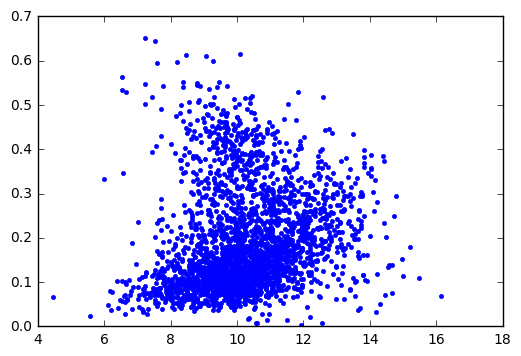

In [62]:
plot(data.SSize/data.SElectorate,data.Sclinton/data.SElectorate,'.')

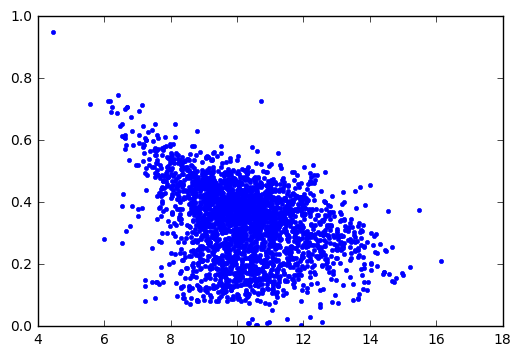

In [63]:
plot(data.SSize/data.SElectorate,data.Strump/data.SElectorate,'.')

In [64]:
lmTrump = smf.ols(formula='Strump ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resTrump = data.Strump - lmTrump.predict()

In [65]:
lmClinton = smf.ols(formula='Sclinton ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resClinton = data.Sclinton - lmClinton.predict()

In [66]:
plot(data.SSize/data.SElectorate,data.resTrump/data.SElectorate,'.')

AttributeError: 'DataFrame' object has no attribute 'resTrump'

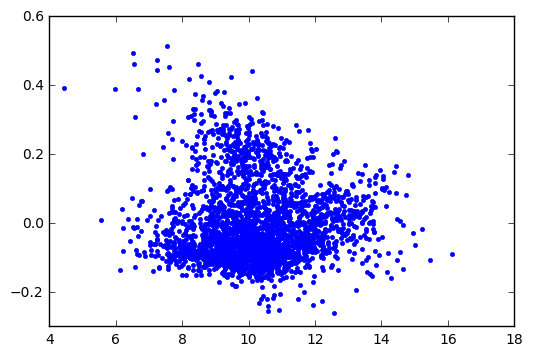

In [67]:
plot(data.SSize/data.SElectorate,resClinton/data.SElectorate,'.')

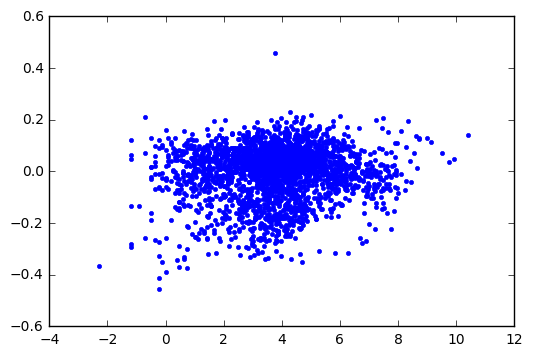

In [68]:
plot(data.SDensity/data.SElectorate,resTrump/data.SElectorate,'.')

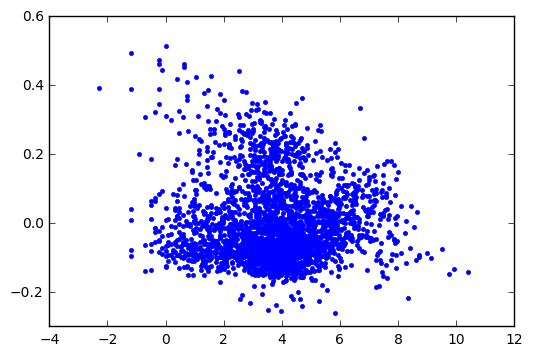

In [69]:
plot(data.SDensity/data.SElectorate,resClinton/data.SElectorate,'.')

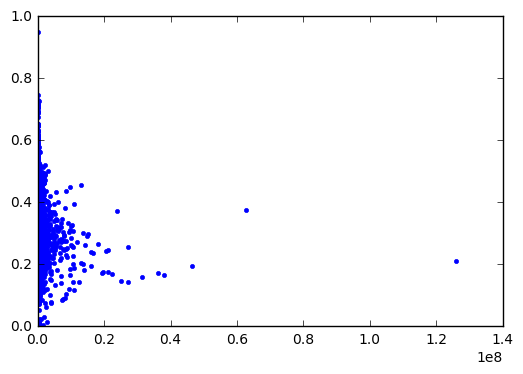

In [70]:
plot(data.TSize,data.trump/data.TElectorate,'.')

In [71]:
ind=(data.Population<1e4)&(data.Population>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6807789237537512

In [72]:
ind=(data.Population<1e3)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.7988649066987703

In [73]:
ind=(data.Population<1e5)&(data.Population>1e4)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6234965717197312

In [74]:
ind=(data.Population<1e7)&(data.Population>1e5)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5492493444489315

In [75]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6141529737655815

In [76]:
ind=(data.Density<1e3)&(data.Population>1e2)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5833182847324875

In [77]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5391731233985939

In [78]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.19143366636014095

In [79]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21322817740492547

In [80]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21518141193793403

In [81]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(sum(data.TLatino[ind]))/sum(data.TElectorate[ind])

0.16025357987793523

In [82]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.11485779576686408

In [83]:
ind=(data.Density<1e4)&(data.Population>1e3)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.17836676856992692

In [84]:
addFactorAnalysis('TElectorate','TDensity');

R2 = 0.1351, p-value=3.097192e-85, estimate=[-8.793852e-05 -7.244508e-05]


In [85]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.TDensity[ind])/sum(data.TElectorate[ind])

3.6732543252525525

In [86]:
singleFactorAnalysis('TDensity')

[0.069083116054927007, 0.059871395032437102]

In [87]:
lm_ = smf.ols(formula='trumpp ~ log(Density)', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           3.47e-26
Time:                        10:54:58   Log-Likelihood:                 663.69
No. Observations:                2640   AIC:                            -1323.
Df Residuals:                    2638   BIC:                            -1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.7262      0.009     82.084   

In [88]:
lm_ = smf.ols(formula='trump ~ TDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                  trump   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.692e+04
Date:                Sat, 19 Nov 2016   Prob (F-statistic):               0.00
Time:                        10:54:58   Log-Likelihood:                -29685.
No. Observations:                2640   AIC:                         5.937e+04
Df Residuals:                    2638   BIC:                         5.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6504.6446    370.460     17.558      0.0

In [307]:
data['logDensity']= log (data['Density'])

In [339]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'Population18', u'Population65', u'Female', u'White', u'Black',
       u'RHI325214', u'Asian', u'RHI525214', u'Mixed', u'Latino', u'WhiteNH',
       u'POP715213', u'Foreign', u'POP815213', u'EDU635213', u'Bachelor',
       u'VET605213', u'LFE305213', u'HSG010214', u'HomeOwners', u'HSG096213',
       u'HSG495213', u'HSD410213', u'HSD310213', u'Income', u'INC110213',
       u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213',
       u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207',
       u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207',
       u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210', u'Density',
       u'trumpp', u'TElectorate', u'TFemale', u'TSeniors', u'TWhite',
       u'TBlack', u'TLatino', u'TAsian', u'TIncome', u'TBachelor', u'TArea',
       u'SEle

In [348]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
%matplotlib inline

In [376]:
data1 = pd.read_csv('countytable.csv' , index_col=0 )

In [377]:
data1 = data1.drop(['area_name'])

In [378]:
data1 = data1.drop(['state_abbreviation','processed'])

In [399]:
del data1['area_name']

In [400]:
data1.columns

Index([u'trump', u'clinton', u'PST045214', u'PST040210', u'PST120214',
       u'POP010210', u'AGE135214', u'AGE295214', u'AGE775214', u'SEX255214',
       u'RHI125214', u'RHI225214', u'RHI325214', u'RHI425214', u'RHI525214',
       u'RHI625214', u'RHI725214', u'RHI825214', u'POP715213', u'POP645213',
       u'POP815213', u'EDU635213', u'EDU685213', u'VET605213', u'LFE305213',
       u'HSG010214', u'HSG445213', u'HSG096213', u'HSG495213', u'HSD410213',
       u'HSD310213', u'INC910213', u'INC110213', u'PVY020213', u'BZA010213',
       u'BZA110213', u'BZA115213', u'NES010213', u'SBO001207', u'SBO315207',
       u'SBO115207', u'SBO215207', u'SBO515207', u'SBO415207', u'SBO015207',
       u'MAN450207', u'WTN220207', u'RTN130207', u'RTN131207', u'AFN120207',
       u'BPS030214', u'LND110210', u'POP060210'],
      dtype='object')

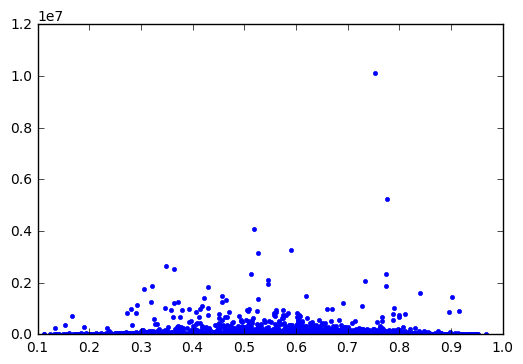

In [401]:
plot(data['trumpp'], data1['PST045214'],'.')

In [382]:
X=data1
range_n_clusters = [4, 5, 6, 7]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

ValueError: could not convert string to float: WV

In [390]:
data1.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'PST045214', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'AGE295214', u'AGE775214', u'SEX255214', u'RHI125214', u'RHI225214',
       u'RHI325214', u'RHI425214', u'RHI525214', u'RHI625214', u'RHI725214',
       u'RHI825214', u'POP715213', u'POP645213', u'POP815213', u'EDU635213',
       u'EDU685213', u'VET605213', u'LFE305213', u'HSG010214', u'HSG445213',
       u'HSG096213', u'HSG495213', u'HSD410213', u'HSD310213', u'INC910213',
       u'INC110213', u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213',
       u'NES010213', u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207',
       u'SBO515207', u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207',
       u'RTN130207', u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210',
       u'POP060210', u'trumpp'],
      dtype='object')

In [404]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit([[getattr(t, 'x%d' % i) for i in range(1, 8)] for t in texts],
        [t.y for t in texts])

TypeError: getattr(): attribute name must be string